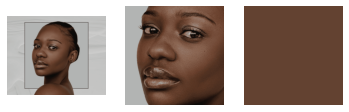

In [71]:

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from colorthief import ColorThief
import os
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

filepath = input('enter the file path:')
IMAGE_FILES = [filepath]

def torgb(img):
    return(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    file = IMAGE_FILES[0]
    #print(type(file))
    img1 = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    # Draw face detections of each face.
    if not results.detections:
        print('no face detected')
    img2 = img1.copy()
    for detection in results.detections:
        box = detection.location_data.relative_bounding_box
        #print(box)
        #print(type(box.xmin))
        (ycor, xcor, _) = img2.shape
        x1 = (int(box.xmin * xcor))
        y1 = (int(box.ymin * ycor))
        x2 = (int((box.xmin+box.width)*xcor))
        y2 = (int((box.ymin+box.height)*ycor))
        #print(x1,x2,y1,y2)
        img3 = img2[y1:y2,x1:x2,:]
        #mp_drawing.draw_detection(img2, detection)
    #plt.imshow(img2_rgb)
    fig = plt.figure()
    fig.add_subplot(1,3,1)
    plt.axis('off')
    plt.imshow(torgb(img1))
    cv2.imwrite('crop.png', img3)
    fig.add_subplot(1,3,2)
    plt.axis('off')
    plt.imshow(torgb(img3))
    #img4 = Image.fromarray(img3)
    ct = ColorThief('crop.png')
    dominant_color = ct.get_color(quality=1)
    #print(dominant_color)
    fig.add_subplot(1,3,3)
    plt.axis('off')
    plt.imshow([[dominant_color]])
    if os.path.exists("crop.png"):
        os.remove("crop.png")

In [72]:
import colorsys
import pickle

file2 = open('model.pickle','rb')
model = pickle.load(file2)

def choosecolor(rgb):
  r = rgb[0]/255
  g = rgb[1]/255
  b = rgb[2]/255
  def tohsv(c):
    return(colorsys.rgb_to_hsv(c[0],c[1],c[2]))
  hue = tohsv((r,g,b))[0]
  sat = tohsv((r,g,b))[1]
  val = tohsv((r,g,b))[2]
  print(g,b,val,sat)
  return(model.predict([[g,b,val,sat]])[0])
result = choosecolor((dominant_color))
print(result)

0.25882352941176473 0.19215686274509805 0.38823529411764707 0.5050505050505051
summer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<class 'dict'>
4
(800, 1000, 3)
(228, 140, 180)
(196, 68, 84)
(196, 220, 244)


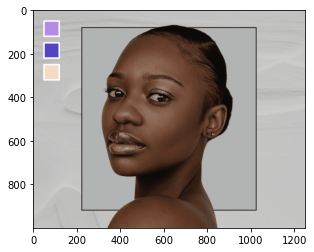

In [73]:
file2 = open('mapseason.pickle','rb')
dict2 = pickle.load(file2)
print(type(dict2))
print(len(dict2))
img3=img2.copy()
print(img3.shape)
(y,x,_) = img3.shape
r = 1000/y
dim = (int(x*r),1000)
img3 = cv2.resize(img3, dim)
#print(resized.shape)
#print(result)
#print(dict2['winter'])
c=0
x=100
w=70
for rgb in dict2[result]:
    img3 = cv2.rectangle(img3, (50,50+c*x), (50+w,50+w+c*x), rgb , -1)
    img3 = cv2.rectangle(img3, (50,50+c*x), (50+w,50+w+c*x), (255,255,255) , 5)
    print(rgb)
    c+=1
plt.imshow(torgb(img3))